# Notebook dedicated to the data visualization for our RIMEL project

## Authors :

- Fabien Airaud
- Axel Delille
- Yvann Ponce
- Apoorva Srinivas Appadoo

---


In [1]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
from collections import defaultdict
import json, os

Load the data to visualize


In [3]:
def load_previous_result(file_path):
    with open(file_path, 'r') as file:
        results = json.load(file)
    return results

input_file = "output.json"
data = load_previous_result(input_file)

output_dir = "./diagram"
os.makedirs(output_dir, exist_ok=True)

Visualize the number of usage for each tool


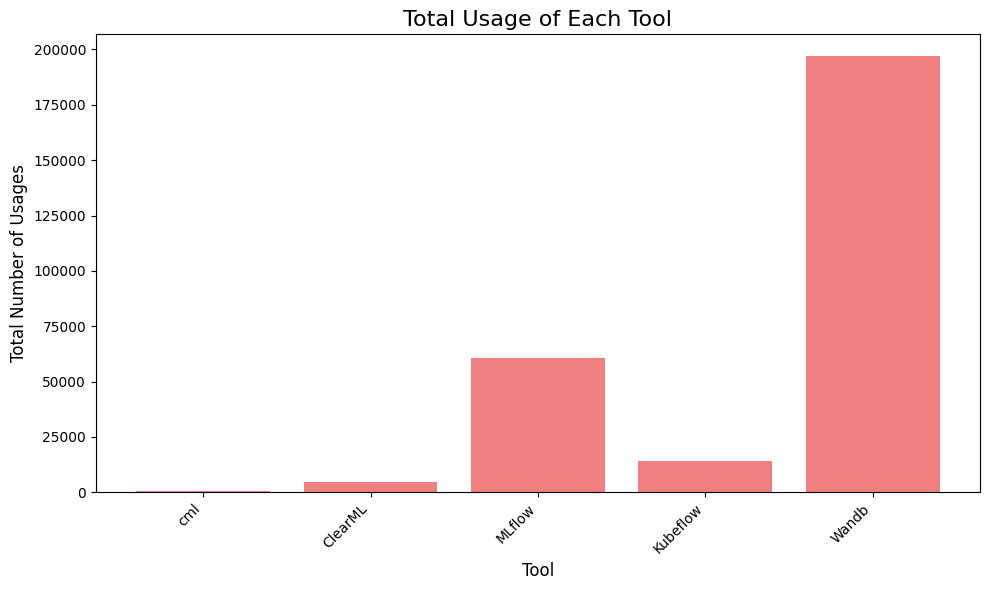

In [6]:
# Aggregate the total number of usages per tool
usage_by_tool = defaultdict(int)
for entry in data:
    if "global" in entry['purpose'] :
        usage_by_tool[entry['tool']] += entry['number']

# Prepare data for plotting
tools = list(usage_by_tool.keys())
total_usages = list(usage_by_tool.values())
output_path = os.path.join(output_dir, "total_usage_comparison.png")

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(tools, total_usages, color="lightcoral")
plt.title("Total Usage of Each Tool", fontsize=16)
plt.xlabel("Tool", fontsize=12)
plt.ylabel("Total Number of Usages", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(output_path)  # Save as PNG file
plt.show()

Visualize data usage for command in each tool


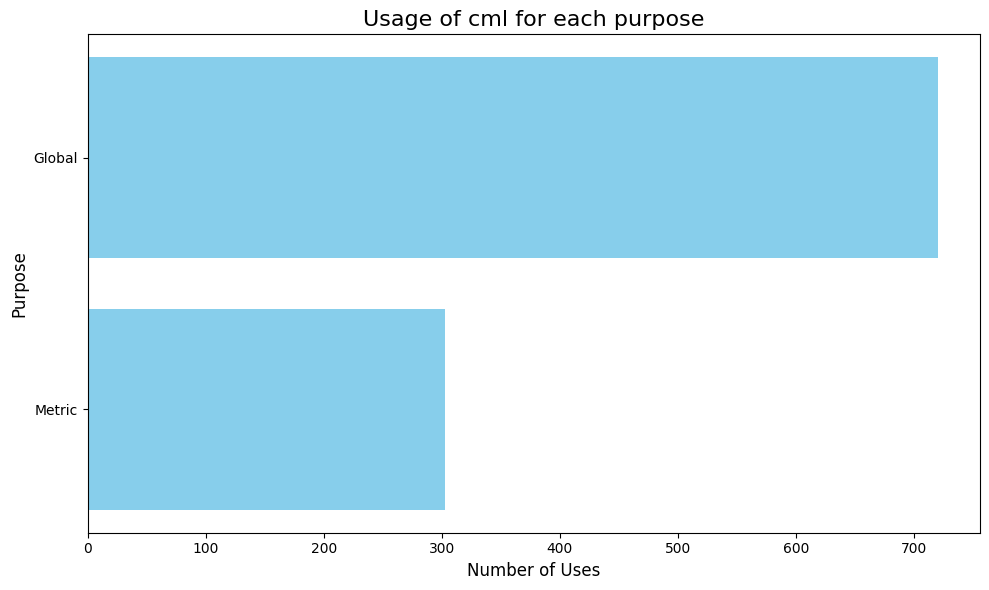

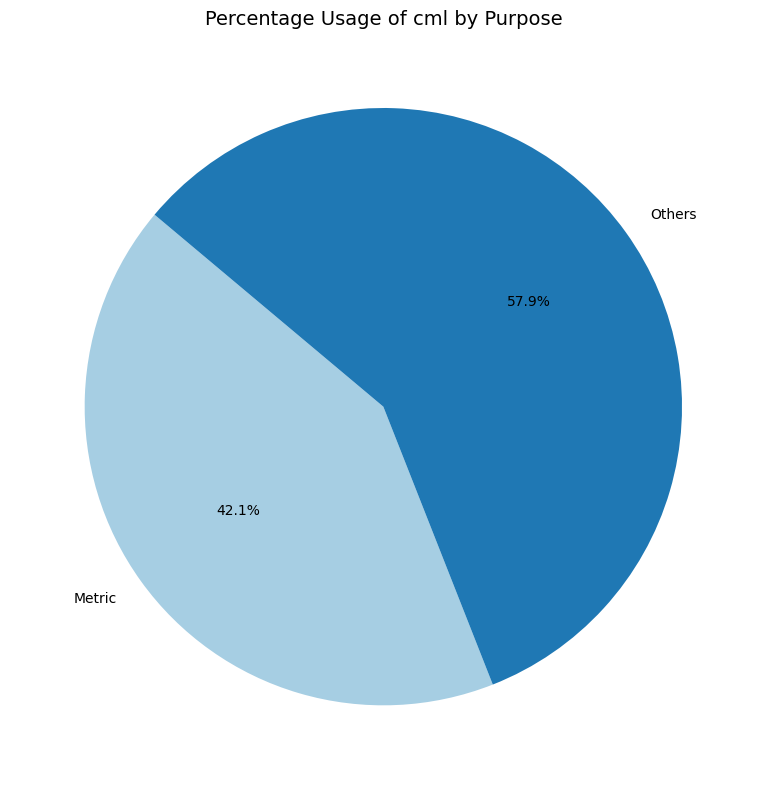

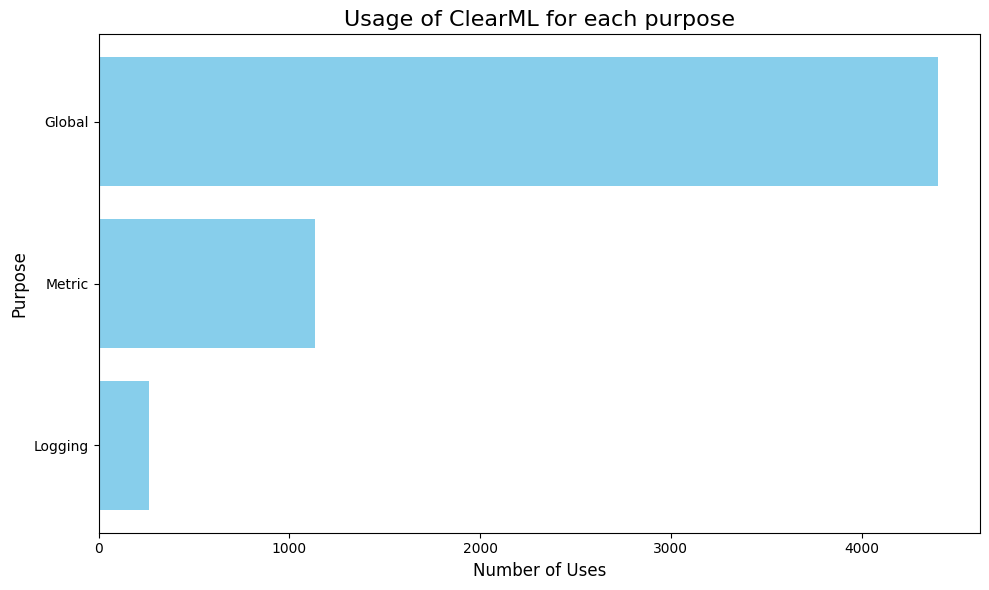

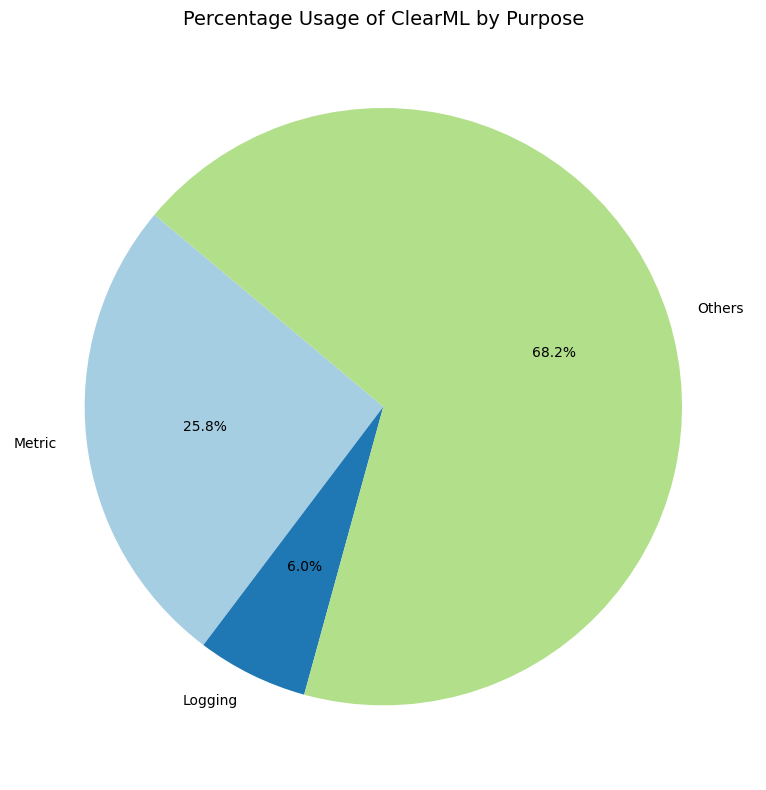

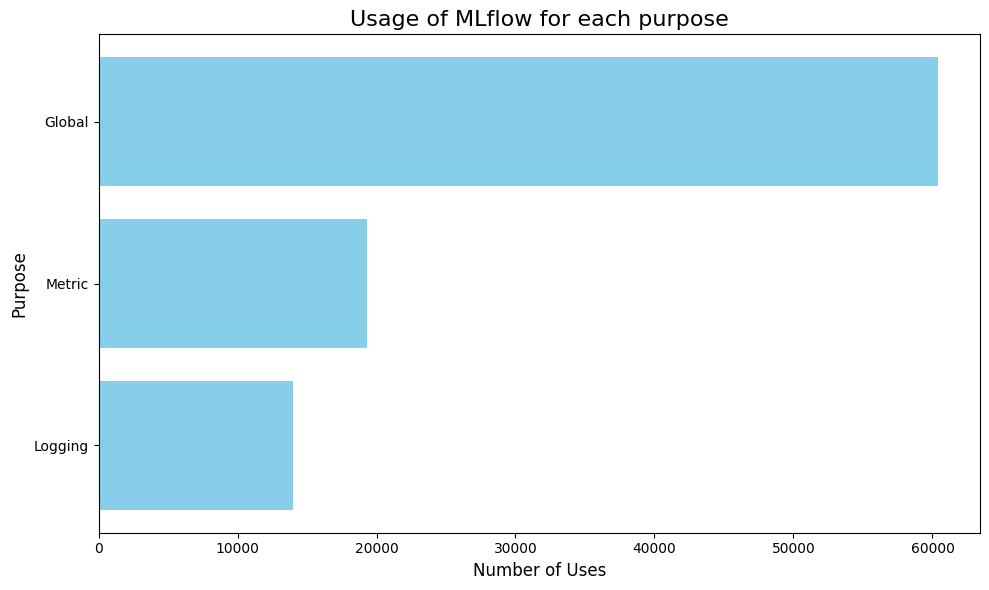

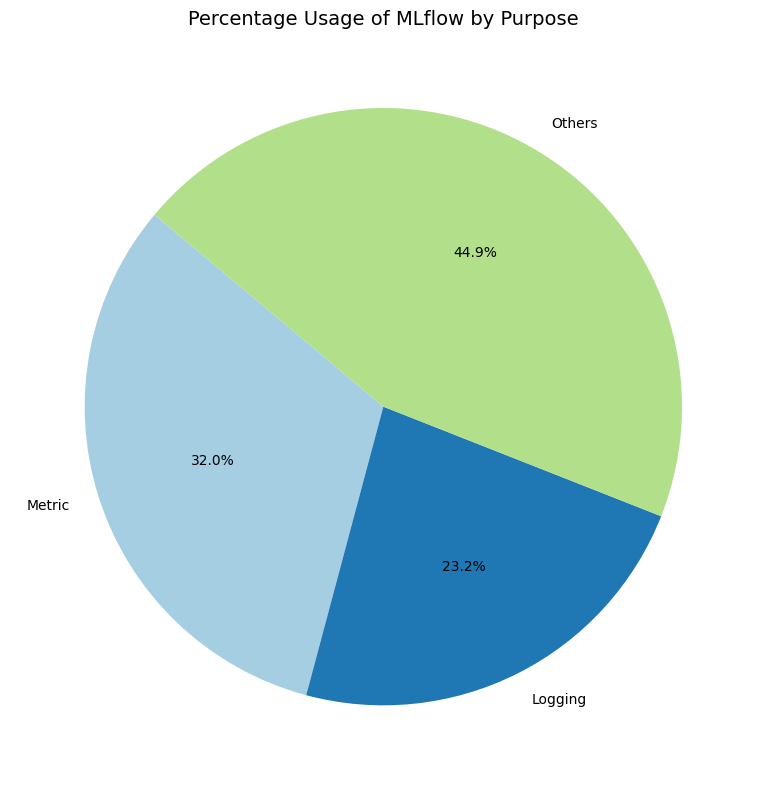

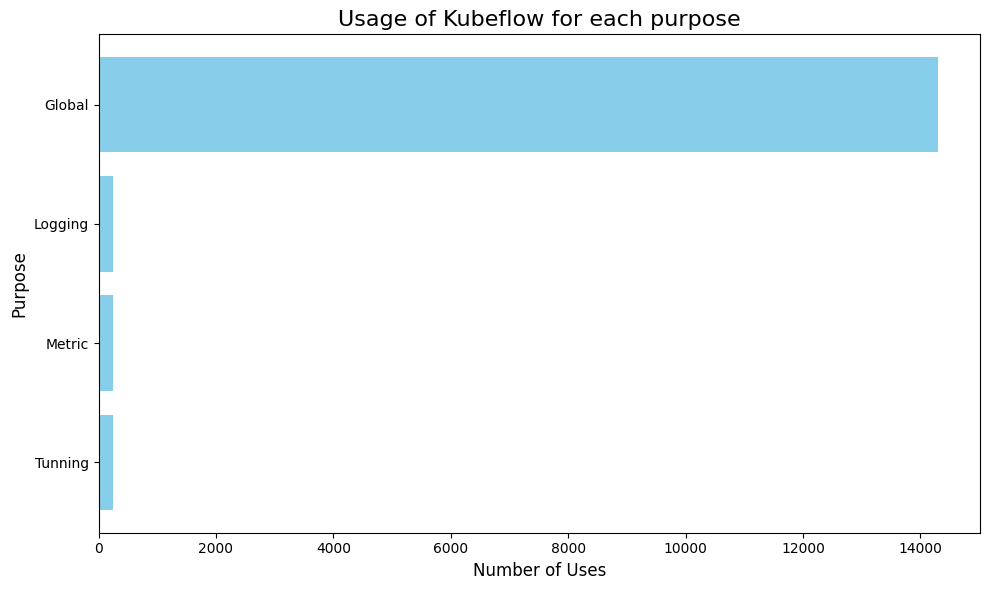

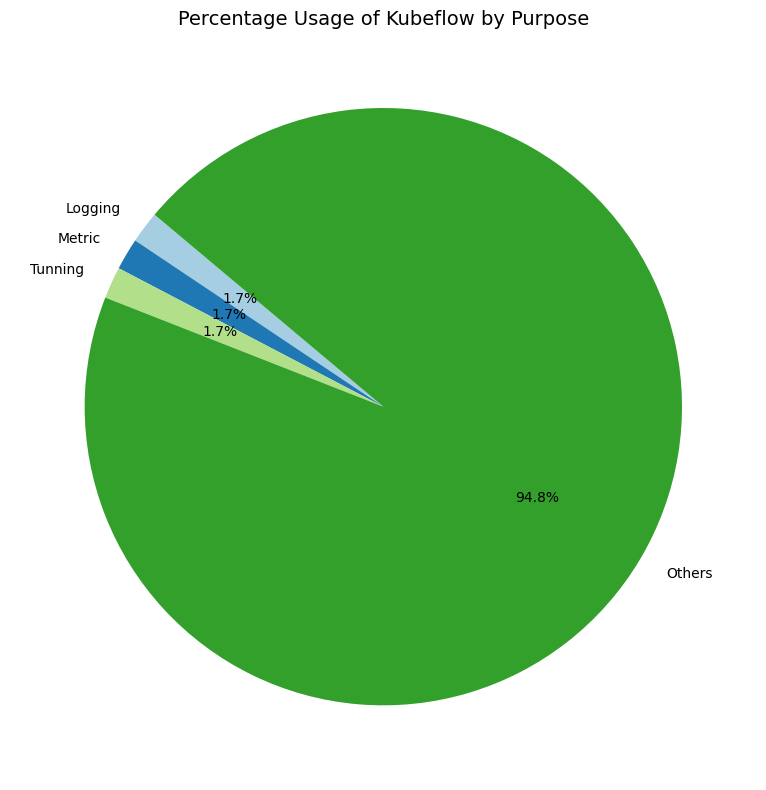

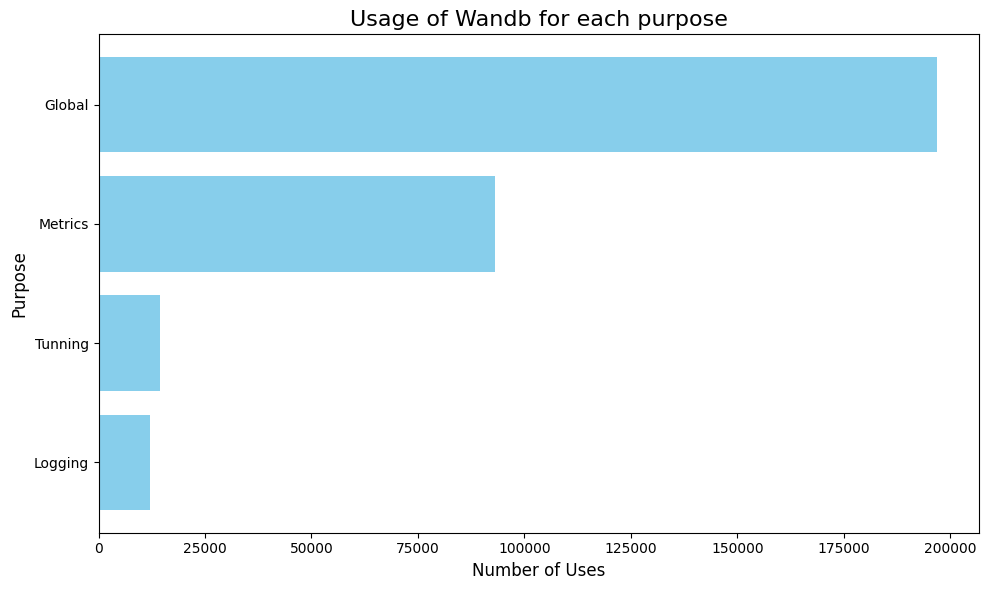

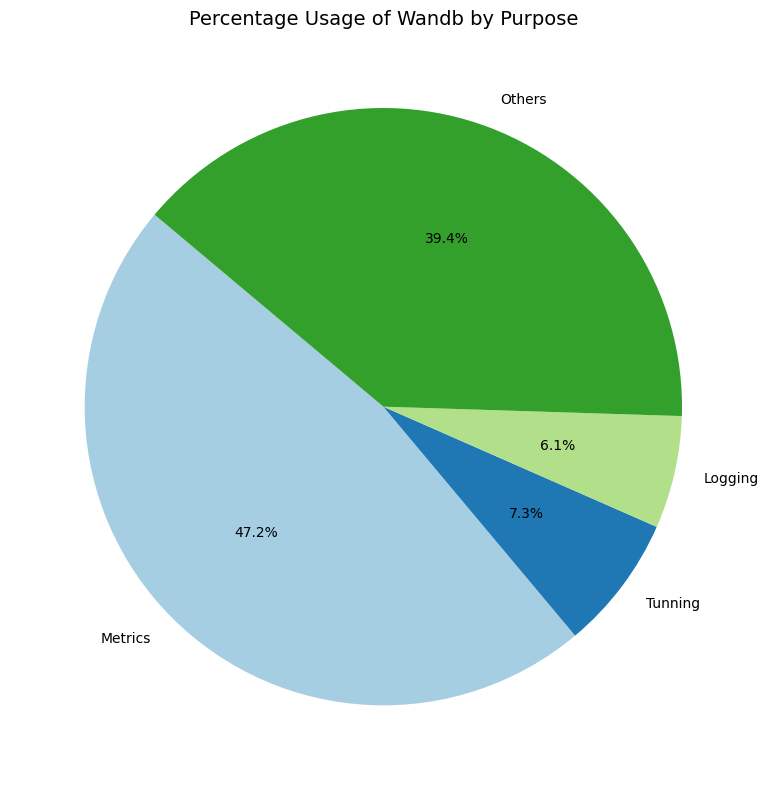

In [15]:
aggregated_data = defaultdict(lambda: defaultdict(int))
for entry in data:
    tool = entry['tool']
    number = entry['number']
    for purpose in entry['purpose']:
        aggregated_data[tool][purpose] += number

# Plot for each tool
for tool, queries_dict in aggregated_data.items():
    # Convert aggregated data into lists of query names and numbers
    queries_names = list(queries_dict.keys())
    queries_numbers = list(queries_dict.values())
    
    # Sort queries by number of uses in descending order
    sorted_queries = sorted(zip(queries_names, queries_numbers), key=lambda x: x[1], reverse=True)
    queries_names, queries_numbers = zip(*sorted_queries)
    
    # Capitalize the first letter of each purpose name
    capitalized_queries_names = [name.capitalize() for name in queries_names]
    
    # Output file path for bar chart
    bar_output_path = os.path.join(output_dir, f"{tool}_usage.png")
    
    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(capitalized_queries_names, queries_numbers, color="skyblue")
    plt.title(f"Usage of {tool} for each purpose", fontsize=16)
    plt.xlabel("Number of Uses", fontsize=12)
    plt.ylabel("Purpose", fontsize=12)
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.tight_layout()
    plt.savefig(bar_output_path)  # Save each plot as a PNG file
    plt.show()
    
    # Check if "global" exists in the data
    if "global" in queries_dict:
        # Extract total calls
        total_calls = queries_dict["global"]
        
        # Remove "global" from purposes for pie chart but calculate others
        pie_purposes = [name for name in queries_names if name != "global"]
        pie_numbers = [queries_dict[name] for name in pie_purposes]
        
        # Calculate "others" as the remaining calls
        sum_of_purposes = sum(pie_numbers)
        others_calls = total_calls - sum_of_purposes
        
        # Add "others" to the pie chart
        pie_purposes.append("others")
        pie_numbers.append(others_calls)
        
        # Capitalize the first letter of each purpose name, including "others"
        capitalized_pie_purposes = [name.capitalize() for name in pie_purposes]
        
        # Calculate percentages
        percentages = [num / total_calls * 100 for num in pie_numbers]
        
        # Output file path for pie chart
        pie_output_path = os.path.join(output_dir, f"{tool}_usage_pie.png")
        
        # Create the pie chart
        plt.figure(figsize=(8, 8))
        plt.pie(percentages, labels=capitalized_pie_purposes, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
        plt.title(f"Percentage Usage of {tool} by Purpose", fontsize=14)
        plt.tight_layout()
        plt.savefig(pie_output_path)  # Save each plot as a PNG file
        plt.show()
